# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Child Mortality rate
### 1.2 Fragestellung:
- Welche Länder hatten in den letzten 10 Jahren die grösste Zunahme der Kindersterblichkeitsrate?   
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
- https://healthdata.gov/
- https://www.who.int/data/collections
- https://www.kaggle.com/datasets?tags=4202-Healthcare




### 1.4 Daten beschaffen und laden

In [2]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# lade hier deine Daten
df=pd.read_csv("child-mortality.csv", skiprows=1, names= ["Gebiete", "Code", "Jahr", "Kindersterblichkeitsrate"])
df.head()

,Gebiete,Code,Jahr,Kindersterblichkeitsrate
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625
2,Afghanistan,AFG,1959,36.043480
3,Afghanistan,AFG,1960,35.459850
4,Afghanistan,AFG,1961,34.894880


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [4]:

df_pivot=df.pivot(index = "Gebiete", columns= "Jahr", values= "Kindersterblichkeitsrate")
df_pivot.head()

Jahr,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gebiete,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.815998,7.528273,7.267698,7.023421,6.791161,6.575211,6.361594,6.155799,5.960755,5.767968
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.046844,0.992791,0.957540,0.940036,0.933377,0.934290,0.938541,0.942817,0.945740,0.943802
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.604556,2.566788,2.530254,2.491073,2.447241,2.398036,2.346064,2.291044,2.233761,2.175275
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.393545,0.375111,0.355793,0.339233,0.324281,0.311451,0.299068,0.288192,0.278005,0.268771
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.794618,9.253248,8.788085,8.397621,8.036232,7.714489,7.418636,7.151876,6.912662,6.687379


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [25]:
df.dtypes

Gebiete                      object
Code                         object
Jahr                          int64
Kindersterblichkeitsrate    float64
dtype: object

### 3.1 Analyse Gebiete 

In [26]:
print("Anzahl verschiedener Gebiete: ", len(df["Gebiete"].unique()))

Anzahl verschiedener Gebiete:  199


In [27]:
df["Gebiete"].value_counts()

Gebiete
Sweden        223
Austria       213
France        207
Belgium       189
Denmark       188
             ... 
Kosovo         38
San Marino     38
Andorra        38
Monaco         38
Nauru          38
Name: count, Length: 199, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiete', ylabel='Anzahl Datenpunkte'>

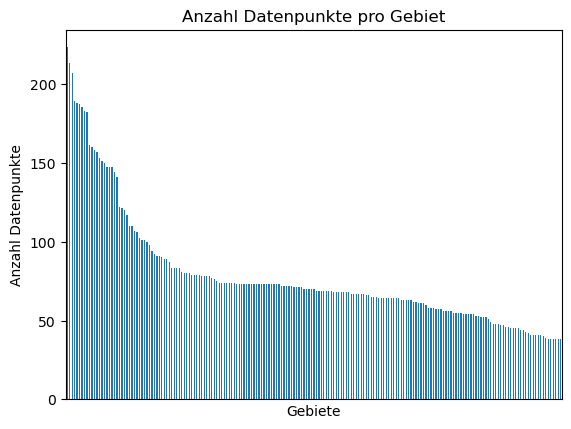

In [28]:
df["Gebiete"].value_counts().plot(kind="bar", 
                                  xticks=[],
                                  ylabel="Anzahl Datenpunkte", title= "Anzahl Datenpunkte pro Gebiet")

### 3.2 Analyse Codes

In [29]:
print("Anzahl verschiedener Codes: ", len(df["Code"].unique()))

Anzahl verschiedener Codes:  198


In [30]:
df["Code"].value_counts()

Code
SWE         223
AUT         213
FRA         207
BEL         189
DNK         188
           ... 
NRU          38
AIA          38
OWID_KOS     38
SMR          38
MCO          38
Name: count, Length: 197, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Code'}, xlabel='Code', ylabel='Anzahl Datenpunkte'>

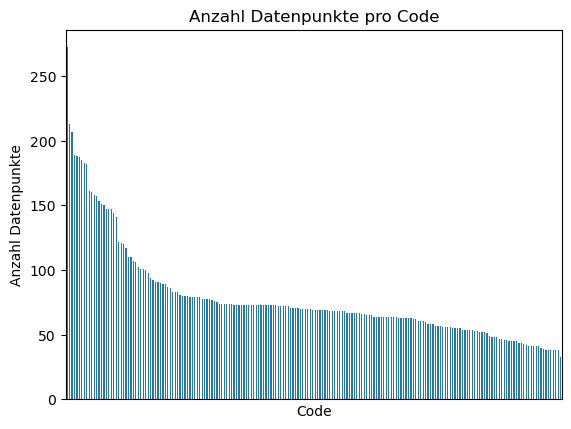

In [12]:
df["Code"].value_counts().plot(kind="bar", 
                                  xticks=[],
                                  ylabel="Anzahl Datenpunkte", title= "Anzahl Datenpunkte pro Code")

### 3.3 Analyse Jahr

In [31]:
print("Anzahl verschiedener Jahre: ", len(df["Jahr"].unique()))

Anzahl verschiedener Jahre:  223


In [32]:
df["Jahr"].value_counts().sort_index()

Jahr
1800      1
1801      1
1802      1
1803      1
1804      1
       ... 
2018    198
2019    198
2020    198
2021    198
2022    198
Name: count, Length: 223, dtype: int64

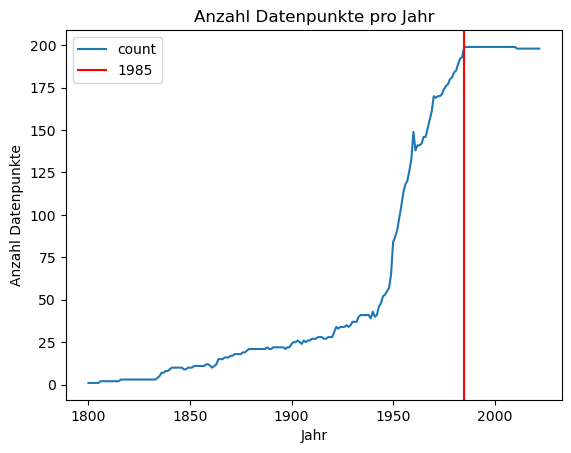

In [29]:
g=df["Jahr"].value_counts().sort_index().plot(ylabel="Anzahl Datenpunkte", title= "Anzahl Datenpunkte pro Jahr");
g.axvline(x=1985, color = 'red', label = '1985')
g.legend()


### 3.4 Analyse Kindersterblichkeit

In [6]:
df.describe()

,Jahr,Kindersterblichkeitsrate
count,15608.000000,15608.000000
mean,1974.224564,10.491636
std,39.630429,10.458375
min,1800.000000,0.146058
25%,1959.000000,2.164301
50%,1983.000000,6.501221
75%,2003.000000,16.408544
max,2022.000000,68.208000


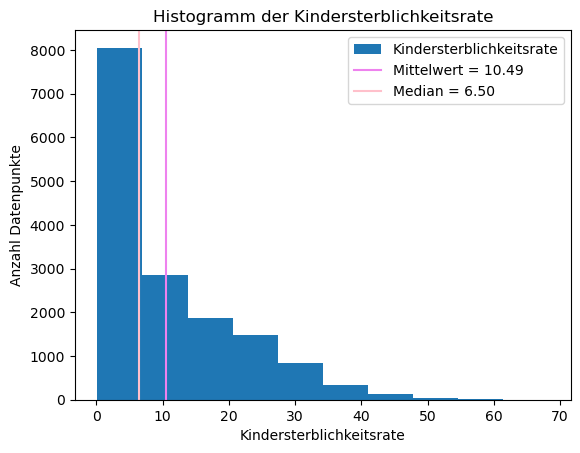

In [24]:
g = df ['Kindersterblichkeitsrate'].plot(kind='hist', bins=10, title='Histogramm der Kindersterblichkeitsrate',
                                         xlabel='Kindersterblichkeitsrate', ylabel='Anzahl Datenpunkte')
mean = df['Kindersterblichkeitsrate'].mean()
g.axvline(x=df['Kindersterblichkeitsrate'].mean(), color = 'violet', label=f'Mittelwert = {mean:.2f}')

median = df['Kindersterblichkeitsrate'].median()
g.axvline(x=df['Kindersterblichkeitsrate'].median(), color='pink',label=f'Median = {median:.2f}')
g.legend()

# bins anpassen evtl. 

### 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

